In [1]:

import pandas as pd
pd.set_option("max.columns", 40)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
x = np.random.randn(20)
y = np.random.randn(20)

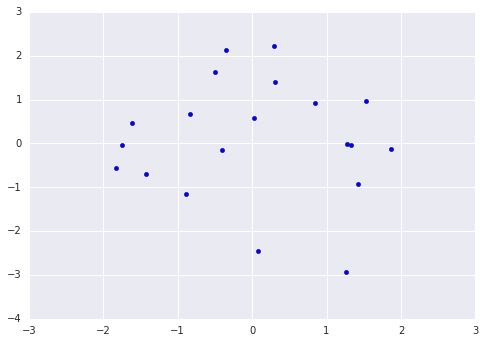

In [5]:
plt.scatter(x,y);

In [6]:
import seaborn as sb

In [7]:
df = pd.read_csv("nba_logreg.csv")
df.head(10)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7%,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6%,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2%,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6%,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4%,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3%,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5%,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5%,0.4,1.5,30.0,0.7,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2%,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3%,0.1,0.3,21.4,1.0,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null object
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(18), int64(1), object(2)
memory usage: 219.9+ KB


### Convert columns to lower case, remove spaces and percent signs

In [6]:
df.columns

Index([u'Name', u'GP', u'MIN', u'PTS', u'FGM', u'FGA', u'FG%', u'3P Made',
       u'3PA', u'3P%', u'FTM', u'FTA', u'FT%', u'OREB', u'DREB', u'REB',
       u'AST', u'STL', u'BLK', u'TOV', u'TARGET_5Yrs'],
      dtype='object')

In [9]:
# Write list comprehension to modify df columns. 
df.columns = [i.lower().replace(" ", "_").replace("3","three_").replace("%", "_percent") for i in df.columns]
df.head()

,name,gp,min,pts,fgm,fga,fg_percent,three_p_made,three_pa,three_p_percent,ftm,fta,ft_percent,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7%,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6%,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2%,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6%,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4%,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [10]:
#Rename target_5yrs column
df.rename(columns={'target_5yrs':"target"}, inplace=True)

### Replace NaN values in 3P%

In [11]:
df.three_p_percent.fillna(df.three_p_percent.mean(), inplace=True)

### Convert FG% column to float

In [2]:
df["fg_percent"] = df.fg_percent.str.replace("%", "").astype(float)

NameError: name 'df' is not defined

### Filter down df

In [13]:
df.columns

Index([u'name', u'gp', u'min', u'pts', u'fgm', u'fga', u'fg_percent',
       u'three_p_made', u'three_pa', u'three_p_percent', u'ftm', u'fta',
       u'ft_percent', u'oreb', u'dreb', u'reb', u'ast', u'stl', u'blk', u'tov',
       u'target'],
      dtype='object')

In [14]:
new_cols = ["gp", "pts", "reb", "ast", "stl", "blk", 'target']
df2 = df[new_cols]
df2.head()

,gp,pts,reb,ast,stl,blk,target
0,36,7.4,4.1,1.9,0.4,0.4,0.0
1,35,7.2,2.4,3.7,1.1,0.5,0.0
2,74,5.2,2.2,1.0,0.5,0.3,0.0
3,58,5.7,1.9,0.8,0.6,0.1,1.0
4,48,4.5,2.5,0.3,0.3,0.4,1.0


##  Exploratory Data Analysis 

### Group by function

In [15]:
df2.groupby("target").mean()

,gp,pts,reb,ast,stl,blk
target,,,,,,
0.0,51.577603,5.042829,2.247544,1.221022,0.498232,0.253438
1.0,65.826715,7.878700,3.516486,1.752347,0.692178,0.439110


In [16]:
df2.groupby("target").agg(["mean", "median", "max", "min", "std"])

gp                                 pts                    \
             mean median max min        std      mean median   max  min   
target                                                                    
0.0     51.577603     51  82  11  16.985646  5.042829    4.1  21.9  0.7   
1.0     65.826715     71  82  16  15.379812  7.878700    6.8  28.2  1.0   

                       reb                                   ast               \
             std      mean median   max  min       std      mean median   max   
target                                                                          
0.0     3.112164  2.247544    1.8  11.0  0.3  1.481560  1.221022    0.9   8.7   
1.0     4.652551  3.516486    3.0  13.9  0.4  2.208026  1.752347    1.2  10.6   

                            stl                                  blk         \
        min       std      mean median  max  min       std      mean median   
target                                                                        
0.0     0.0  1.104808  0.498232    0.4  2.1  0.0  0.321991  0.253438    0.2   
1.0     0.0  1.623945  0.692178    0.6  2.5  0.0  0.439440  0.439110    0.3   

                            
        max  min       std  
target                      
0.0     2.1  0.0  0.286324  
1.0     3.9  0.0  0.483410

### Seaborn plotting

In [17]:
df2.corr()

,gp,pts,reb,ast,stl,blk,target
gp,1.000000,0.538471,0.460406,0.372749,0.451137,0.276498,0.396833
pts,0.538471,1.000000,0.676849,0.552338,0.675341,0.387043,0.315981
reb,0.460406,0.676849,1.000000,0.119081,0.381154,0.699672,0.299406
ast,0.372749,0.552338,0.119081,1.000000,0.751289,-0.086470,0.175353
stl,0.451137,0.675341,0.381154,0.751289,1.000000,0.133808,0.229811
blk,0.276498,0.387043,0.699672,-0.086470,0.133808,1.000000,0.210114
target,0.396833,0.315981,0.299406,0.175353,0.229811,0.210114,1.000000


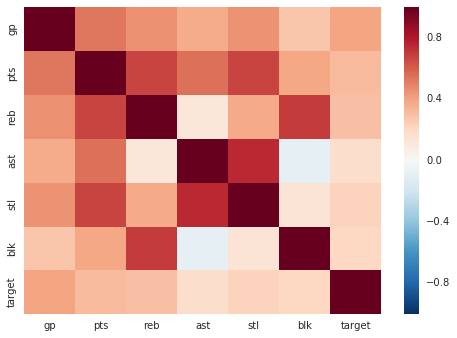

In [18]:
sb.heatmap(df2.corr());

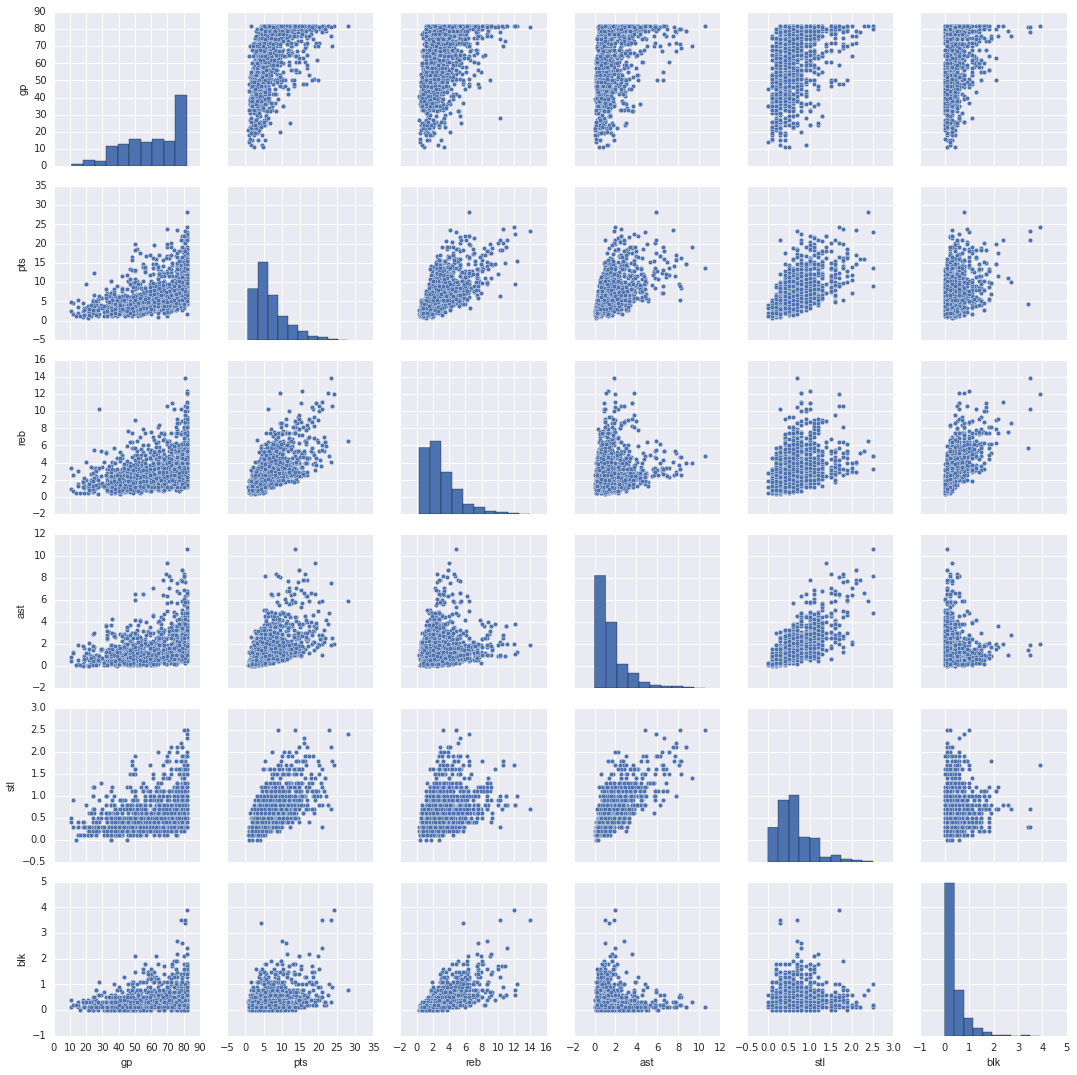

In [19]:
sb.pairplot(df2.drop("target", axis=1))

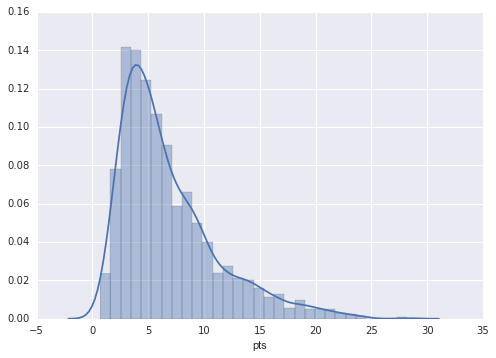

In [20]:
sb.distplot(df2.pts);

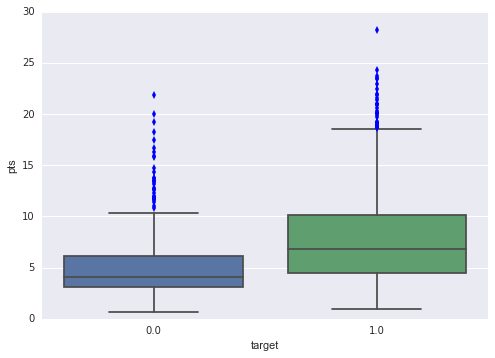

In [21]:
sb.boxplot(x="target", y="pts", data=df2)

## King County, WA Home Sales Data

In [22]:
dfh = pd.read_csv("kc_house_data.csv")

In [23]:
dfh.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
dfh.describe()[["price", "bedrooms", "bathrooms", "sqft_living", "floors", "yr_built"]]

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,2015.000000


In [25]:
dfh.bedrooms.value_counts(normalize=True)

3     0.454541
4     0.318419
2     0.127701
5     0.074076
6     0.012585
1     0.009207
7     0.001758
8     0.000601
0     0.000601
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64

In [26]:
dfh.bathrooms.value_counts(normalize=True)

2.50    0.248924
1.00    0.178226
1.75    0.141026
2.25    0.094712
2.00    0.089298
1.50    0.066904
2.75    0.054828
3.00    0.034840
3.50    0.033822
3.25    0.027252
3.75    0.007172
4.00    0.006293
4.50    0.004627
4.25    0.003655
0.75    0.003331
4.75    0.001064
5.00    0.000972
5.25    0.000601
0.00    0.000463
5.50    0.000463
1.25    0.000416
6.00    0.000278
0.50    0.000185
5.75    0.000185
8.00    0.000093
6.50    0.000093
6.25    0.000093
6.75    0.000093
7.75    0.000046
7.50    0.000046
Name: bathrooms, dtype: float64

### Crosstab method

In [27]:
pd.crosstab(dfh.bedrooms, dfh.bathrooms ).loc[:7, :5.0]

bathrooms,0.0,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0
bedrooms,,,,,,,,,,,,,,,,,,,,
0,7,0,1,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1,3,1,27,138,2,12,4,6,4,2,0,0,0,0,0,0,0,0,0,0
2,0,2,26,1558,3,294,304,216,118,197,20,13,8,1,0,0,0,0,0,0
3,0,0,16,1780,4,829,1870,1048,1082,2357,275,197,184,143,17,11,6,5,0,0
4,0,1,2,325,0,254,719,525,709,2502,639,326,254,395,78,58,38,32,7,7
5,0,0,0,43,0,48,134,110,116,287,214,163,129,169,44,48,25,35,11,7
6,0,0,0,6,0,6,16,24,15,29,31,45,12,17,13,11,8,23,3,6
7,0,0,0,1,0,2,0,0,3,2,3,3,1,5,2,5,2,3,2,0


### Convert date column to a timeseries object and extract year/month values

In [28]:
dfh.date.dtype

dtype('O')

In [29]:
dfh["date"] = pd.to_datetime(dfh.date)
date = dfh.date[0]

In [30]:
dir(date)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__qualname__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_get_field',
 '_get_start_end_field',
 '_has_time_component',
 '_repr_base',
 '_round',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'freq',
 'freqstr',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'nanosecond',
 '

In [31]:
#Create a column of sale month and sale date
dfh["sale_month"] = dfh.date.apply(lambda x:x.month)
dfh["sale_year"] = dfh.date.apply(lambda x:x.year)

### Applying a function over a pandas series

In [32]:
def price_sorter(x):
    if x > 650000.0:
        return "high"
    elif x <= 650000.0 and x > 400000.0:
        return "medium"
    else:
        return "low"
    
dfh["price_category"] = dfh.price.apply(price_sorter)

### Plot price over time

In [33]:
#Sort df by date
dfh_sorted = dfh.sort_values("date")

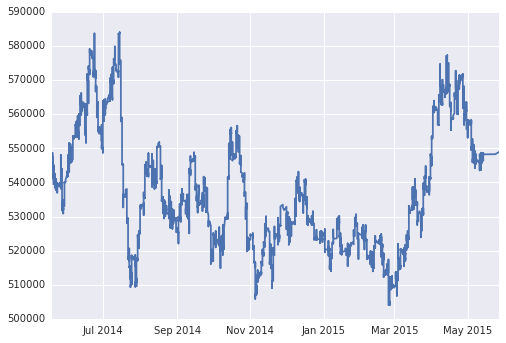

In [34]:
plt.plot(dfh_sorted.date, pd.rolling_mean(dfh_sorted.price, window=1000));

### Seaborn's regplot

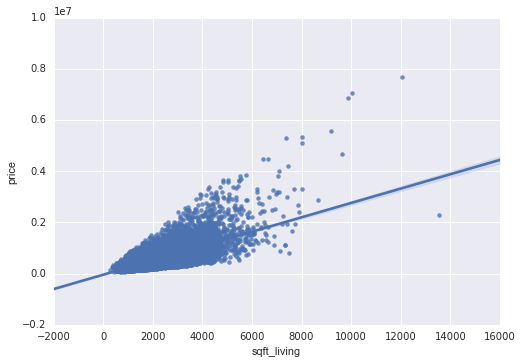

In [35]:
sb.regplot("sqft_living", "price", data=dfh)